In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
#  /kaggle/input/food41/images/macarons/2428554.jpg

!nvidia-smi

Sat Jan 22 01:49:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.76       Driver Version: 496.76       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   49C    P8    18W / 240W |   2773MiB /  8192MiB |     18%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
data_dir = './Food_image/images'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ***Data Collection***

In [19]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [20]:
train_data = datagen.flow_from_directory(data_dir, target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'training')

val_data = datagen.flow_from_directory(data_dir, target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [27]:
ResNet_V2_50 = 'https://tfhub.dev/google/imagenet/resnet_v1_50/classification/5'
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [28]:
import tensorflow_hub as hub

## ***ResNet Model Building***

In [29]:
model_ResNet = tf.keras.Sequential([
    hub.KerasLayer(ResNet_V2_50, trainable = False, input_shape = (250,250,3), name = 'Resnet_V2_50'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(101, activation = 'softmax', name = 'Output_layer')
])

model_ResNet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [30]:
model_ResNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Resnet_V2_50 (KerasLayer)   (None, 1001)              25612201  
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 Output_layer (Dense)        (None, 101)               101202    
                                                                 
Total params: 25,713,403
Trainable params: 101,202
Non-trainable params: 25,612,201
_________________________________________________________________


In [31]:
tf.keras.utils.plot_model(model_ResNet)

TypeError: tuple expected at most 1 argument, got 2

In [12]:
resnet_model = model_ResNet.fit(train_data, epochs = 10, verbose = 1) #5

2021-10-28 10:54:04.120461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-28 10:54:04.123440: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


Epoch 1/10


2021-10-28 10:54:07.344846: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-28 10:54:08.212116: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-28 10:54:08.236921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2525/2525 [==============================] - 795s 311ms/step - loss: 2.6043 - accuracy: 0.4004
Epoch 2/10
2525/2525 [==============================] - 438s 174ms/step - loss: 1.8179 - accuracy: 0.5534
Epoch 3/10
2525/2525 [==============================] - 436s 173ms/step - loss: 1.7089 - accuracy: 0.5735
Epoch 4/10
2525/2525 [==============================] - 441s 175ms/step - loss: 1.6456 - accuracy: 0.5879
Epoch 5/10
2525/2525 [==============================] - 449s 178ms/step - loss: 1.5932 - accuracy: 0.5999
Epoch 6/10
2525/2525 [==============================] - 436s 173ms/step - loss: 1.5324 - accuracy: 0.6103
Epoch 7/10
2525/2525 [==============================] - 438s 173ms/step - loss: 1.4960 - accuracy: 0.6188
Epoch 8/10
2525/2525 [==============================] - 437s 173ms/step - loss: 1.4844 - accuracy: 0.6205
Epoch 9/10
2525/2525 [==============================] - 438s 174ms/step - loss: 1.4485 - accuracy: 0.6280
Epoch 10/10
2525/2525 [==============================] - 

In [13]:
model_ResNet.evaluate(val_data)

632/632 [==============================] - 214s 338ms/step - loss: 2.0603 - accuracy: 0.5490


[2.060263156890869, 0.5489603877067566]

## ***Efficientnet Model Building***

In [14]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (250,250,3), name = 'Resnet_V2_50'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(101, activation = 'softmax', name = 'Output_layer')
])

model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [15]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 10, verbose = 1)

Epoch 1/10
2525/2525 [==============================] - 458s 180ms/step - loss: 2.0628 - accuracy: 0.4994
Epoch 2/10
2525/2525 [==============================] - 442s 175ms/step - loss: 1.2352 - accuracy: 0.6770
Epoch 3/10
2525/2525 [==============================] - 419s 166ms/step - loss: 1.1212 - accuracy: 0.7023
Epoch 4/10
2525/2525 [==============================] - 426s 169ms/step - loss: 1.0618 - accuracy: 0.7166
Epoch 5/10
2525/2525 [==============================] - 434s 172ms/step - loss: 0.9964 - accuracy: 0.7310
Epoch 6/10
2525/2525 [==============================] - 421s 167ms/step - loss: 0.9808 - accuracy: 0.7367
Epoch 7/10
2525/2525 [==============================] - 437s 173ms/step - loss: 0.9362 - accuracy: 0.7464
Epoch 8/10
2525/2525 [==============================] - 417s 165ms/step - loss: 0.9356 - accuracy: 0.7439
Epoch 9/10
2525/2525 [==============================] - 411s 163ms/step - loss: 0.8864 - accuracy: 0.7570
Epoch 10/10
2525/2525 [=======================

In [16]:
model_Efficientnet.evaluate(val_data)

632/632 [==============================] - 127s 200ms/step - loss: 1.4776 - accuracy: 0.6647


[1.4775962829589844, 0.664653480052948]

## ***Comparison Between Both Models***

In [17]:
def plot_graph(history, history_1):
    loss_res = history.history['loss']
    loss_ef = history_1.history['loss']
    
    Accuracy_res = history.history['accuracy']
    Accuracy_ef = history_1.history['accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss_res, label = 'ResNet Loss')
    plt.plot(epochs, loss_ef, label = 'Efficientnet Loss')
    plt.title('Epochs Vs Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, Accuracy_res, label = 'ResNet Accuracy')
    plt.plot(epochs, Accuracy_ef, label = 'Efficientnet Accuracy')
    plt.title('Epochs Vs Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

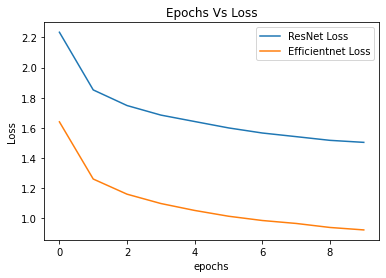

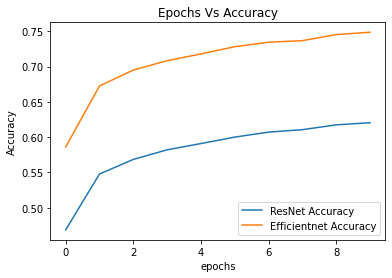

In [18]:
plot_graph(resnet_model, efficientnet_model)